 
**Question 1:
 Using the given MT cars dataset you need to find outlier with z score.**

In [738]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [739]:
mtcars= pd.read_csv("/content/drive/My Drive/Colab Notebooks/mtcars.csv")

In [740]:
data_frame=mtcars.hp

In [741]:
mtcars

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [742]:
mtcars.shape

(32, 12)

In [743]:
from sklearn import neighbors, datasets, preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

In [744]:
mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [745]:
mtcars['hp'].describe()

count     32.000000
mean     146.687500
std       68.562868
min       52.000000
25%       96.500000
50%      123.000000
75%      180.000000
max      335.000000
Name: hp, dtype: float64

In [746]:
mtcars.isnull().any() ## checking null values 

model    False
mpg      False
cyl      False
disp     False
hp       False
drat     False
wt       False
qsec     False
vs       False
am       False
gear     False
carb     False
dtype: bool

In [747]:
data= list(mtcars["hp"])
('hp is =',data)

('hp is =',
 [110,
  110,
  93,
  110,
  175,
  105,
  245,
  62,
  95,
  123,
  123,
  180,
  180,
  180,
  205,
  215,
  230,
  66,
  52,
  65,
  97,
  150,
  150,
  245,
  175,
  66,
  91,
  113,
  264,
  175,
  335,
  109])

AxesSubplot(0.125,0.125;0.775x0.755)


(0.0, 400.0)

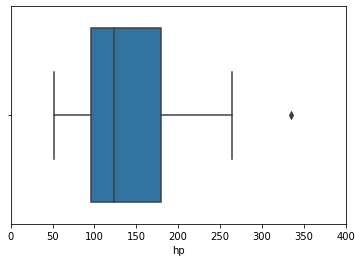

In [748]:
print(sns.boxplot(x=mtcars['hp']))  ##BOX PLOT
plt.xlim(0,400)

In [749]:
import numpy as np
from scipy import stats
Q1=mtcars['hp'].quantile(0.25)
Q3=mtcars['hp'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)


96.5
180.0
83.5


In [750]:
Lower_Whisker= Q1-1.5*IQR
Upper_Whisker= Q3+1.5*IQR
print(Lower_Whisker,Upper_Whisker)

-28.75 305.25


In [751]:
mtcars=mtcars[mtcars['hp']< Upper_Whisker]

In [752]:
mtcars.tail()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
26,Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.7,0,1,5,2
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [753]:
mtcars.shape ##After outlier 

(31, 12)

In [754]:
from scipy import stats
import numpy as np
z=np.abs(stats.zscore(mtcars.hp))
print(z)

[0.51597718 0.51597718 0.80251034 0.51597718 0.5795908  0.60025164
 1.75943323 1.32501199 0.76880055 0.29686358 0.29686358 0.66386526
 0.66386526 0.66386526 1.08523756 1.25378648 1.50660986 1.25759242
 1.49356091 1.27444731 0.73509077 0.1582185  0.1582185  1.75943323
 0.5795908  1.25759242 0.83622012 0.4654125  2.07967618 0.5795908
 0.53283207]


In [755]:

def detect_outliers(data):
  outliers=[]
  threshold=2
  mean =np.mean(data)
  std =np.std(data)

  for i in data:
       z_score =(i-mean)/std
       if np.abs(z_score)>threshold:
          outliers.append(i)
  return outliers 

In [756]:
outlier_pt=detect_outliers(data)

In [757]:
outlier_pt

[335]


**Question2:
● Using the Boston data set from sklearn, find out the Outlier and treat them.** 



Importing Boston Dataset From Sklearn

In [758]:
import os
import seaborn as sb
import numpy as np
import pandas as pd
import sklearn as sk

In [759]:
bost=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Boston.csv')

In [760]:
bost.head(10)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [761]:
bost.shape

(506, 15)

In [762]:
bost.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [763]:
bost.isnull().any()

Unnamed: 0    False
crim          False
zn            False
indus         False
chas          False
nox           False
rm            False
age           False
dis           False
rad           False
tax           False
ptratio       False
black         False
lstat         False
medv          False
dtype: bool

AxesSubplot(0.125,0.125;0.775x0.755)


(0.0, 14.0)

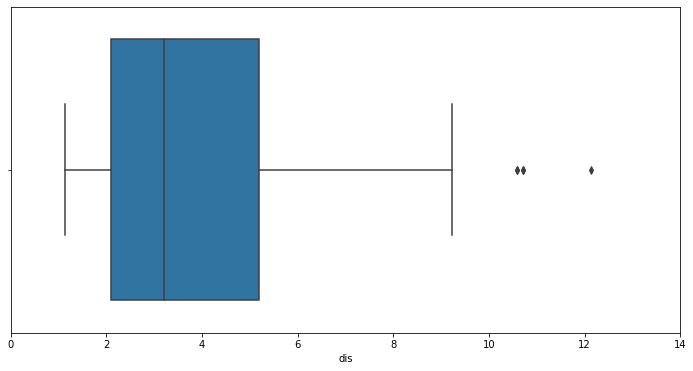

In [764]:
plt.figure(figsize=(12,6))
print(sb.boxplot(x=bost['dis']))
plt.xlim(0,14)

In [765]:
mean =np.mean(bost.dis)
print("mean is",mean)

mean is 3.795042687747034


In [766]:
std_div =np.std(bost.dis)
print("std_div is",std_div)

std_div is 2.103628356344459


In [767]:
threshold=3
outlier=[]
for i in bost.dis:
    z=(i-mean)/std_div
    if z>threshold:
        outlier.append(i)
print('Outliers=',outlier)

Outliers= [10.7103, 10.7103, 12.1265, 10.5857, 10.5857]


In [768]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(bost))
print(z)


[[1.72863116 0.41978194 0.28482986 ... 0.44105193 1.0755623  0.15968566]
 [1.72178509 0.41733926 0.48772236 ... 0.44105193 0.49243937 0.10152429]
 [1.71493903 0.41734159 0.48772236 ... 0.39642699 1.2087274  1.32424667]
 ...
 [1.71493903 0.41344658 0.48772236 ... 0.44105193 0.98304761 0.14880191]
 [1.72178509 0.40776407 0.48772236 ... 0.4032249  0.86530163 0.0579893 ]
 [1.72863116 0.41500016 0.48772236 ... 0.44105193 0.66905833 1.15724782]]


**Outlier Treatment**

In [769]:
import numpy as np
from scipy import stats
Q1=bost['dis'].quantile(0.25)
Q3=bost['dis'].quantile(0.75)
IQR=Q3-Q1
print('values of dis')
print('Q1=',Q1)
print('Q3=',Q3)
print('IQR=',IQR)


values of dis
Q1= 2.100175
Q3= 5.1884250000000005
IQR= 3.0882500000000004


In [770]:
Lower_Whisker= Q1-1.5*IQR
Upper_Whisker= Q3+1.5*IQR
print(Lower_Whisker,Upper_Whisker)

-2.5322000000000005 9.820800000000002


In [771]:
bost=bost[bost['dis']< Upper_Whisker]

***After Removing Outlier ***

In [772]:
bost.shape

(501, 15)

In [773]:
print(bost)

     Unnamed: 0     crim    zn  indus  chas  ...  tax  ptratio   black  lstat  medv
0             1  0.00632  18.0   2.31     0  ...  296     15.3  396.90   4.98  24.0
1             2  0.02731   0.0   7.07     0  ...  242     17.8  396.90   9.14  21.6
2             3  0.02729   0.0   7.07     0  ...  242     17.8  392.83   4.03  34.7
3             4  0.03237   0.0   2.18     0  ...  222     18.7  394.63   2.94  33.4
4             5  0.06905   0.0   2.18     0  ...  222     18.7  396.90   5.33  36.2
..          ...      ...   ...    ...   ...  ...  ...      ...     ...    ...   ...
501         502  0.06263   0.0  11.93     0  ...  273     21.0  391.99   9.67  22.4
502         503  0.04527   0.0  11.93     0  ...  273     21.0  396.90   9.08  20.6
503         504  0.06076   0.0  11.93     0  ...  273     21.0  396.90   5.64  23.9
504         505  0.10959   0.0  11.93     0  ...  273     21.0  393.45   6.48  22.0
505         506  0.04741   0.0  11.93     0  ...  273     21.0  396.90   7.8

In [774]:
bost1=bost['dis']

**Boxplot after removing outliers**

>"dis"



AxesSubplot(0.125,0.125;0.775x0.755)


(0.0, 14.0)

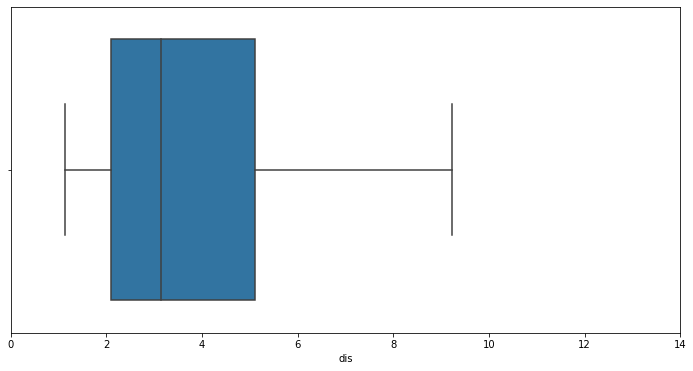

In [776]:
plt.figure(figsize=(12,6))
print(sb.boxplot(x=bost1))
plt.xlim(0,14)